In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("HW3.ipynb")

# DATA 601: HW3



**Learning Objectives**
- Work with realworld datasets that can be compared to a model.
- Apply vectorization concepts to iterative problems.
- Explore different programming paradigms to solve problems.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Warm up

In this notebook, we'll use file input/output operations provided by Python to read in data from text files. The function needed to read data is provided in the code cell below. You may wish to review the following section from the Python Tutorial:  

- [Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

In [7]:
import re

def fileToList( fname, regexp=r'\W+' ):
    '''Read text from a file using the provided regular expression. If no regular expression is provided, 
    the default behaviour is to split the text into words removing any punctuation and empty strings. 
    The resulting words are returned in a list.'''
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided regular expression and remove empty strings
    # By default, matches words.
    return [x for x in re.split(regexp, text) if x]


<!-- BEGIN QUESTION -->

## Question 1 (15 points)

### Comparing empirically determined frequencies to a model 

##### Motivation: 
It is useful to compare a theoretical distribution visually with a data set to examine if an assumptions about the data is true, this problem provides you an exercises in this comparison.

##### Tools: 
For this question you may use `NumPy` and `matplotlib`. You may also use any built-in data structures or functions. However, please do not use `pandas`. 

##### Overview:
This question asks you to perform a frequency analysis on the first letter of words in the novel "Moby Dick" by Herman Melville, and compare the result with the first letter law (FLL) inspired by Benford's law. For visual comparison, you are asked to graph the result obtained along with the theoretical result to determine how closely the results match.

 
##### Background: 

[Benford’s law](https://en.wikipedia.org/wiki/Benford%27s_law) describes the expected frequency of the leading digit in a set of numbers. Inspired by this law, [Yan et al. (2018)](https://www.sciencedirect.com/science/article/pii/S0378437118310768) have recently proposed a First Letter Law (FLL) that predicts the percentages of first letters in novels. 

An overview of FLL in the context of the English language (26 letters) is as follows.

The probability $p_i$ of the $i$-th ($1 \le i \le 26$) most frequently occurring letter in a novel is given by:
$$
p_i = \frac{26 - 25\log_{26}25 - i \log_{26} i + (i-1) \log_{26} (i-1)}
           {26 \cdot 25 \log_{26} (\tfrac{26}{25})}
$$

For example, the most frequently occurring letter ($i=1$) in an English novel appears with probability:
$$
p_1 = \frac{1 + 25 \log_{26}(\tfrac{26}{25})}{26 \cdot 25 \log_{26}(\tfrac{26}{25})}.
$$

For more details, please consult:

 - _Benford's Law and First Letter of Word_, Xiaoyong Yan, Seong-Gyu Yang, Beom Jun Kim, Petter Minnhagen (Dec. 2017) [arXiv:1712.06074](https://doi.org/10.48550/arXiv.1712.06074)


##### Process: 

##### Step 0)

Reflect on the data. 
- Do you think the novel Moby Dick will exhibit the First Letter Law? Why/why not? 

#Yes, I think it will exhibit this law. Seemingly, the first letters of the alphabet are more repeatable in words. Letters like 'a, e, i' are vowels that make up the structure of many words and are also at the beginning of the alphabet. So, it would make sense to see this pattern in such a large book.

##### Step 1) 
- Read in the relevant data:

    Use the function `fileToList` (defined above) to read the text file corresponding to the novel Moby Dick (data courtesy of [Project Gutenberg](https://www.gutenberg.org/ebooks/2701)). Please use the function's default behaviour, i.e. you do not need to supply a regular expression.

Now perform the following tasks. 

- Convert all words to lower case.
- For each word, retain only the first letter, drop any word that does not start with a letter ([a-z]).
- Determine the frequency of each of the letters `a` through `z`.
- Calculate the probability of each of the letters occurring in the novel (as first letters) by using the formula $p=frequency/total$.
- Sort the probabilities in descending order. This will give you $p_i$.
- Plot the probability distribution, with $i$ on the horizontal axis and probability on the vertical axis. Also indicate the _rank_ of the letters (which letter is the most frequent, second-most frequent, and so on).
- On the same plot include a plot of the First Letter Law. 

##### Return data types
- For the counts the data type should be an integer
- For the probabilities the data type should be a float

##### Hints:
- You may use `NumPy`, in fact it is recommended. Remember `NumPy` arrays are indexed and you can create an array of `n` zeros using `np.zeros(n)`.
- Use the fact that $(i-1) \log_{26}(i-1)$ for $i=1$ is $0$ to avoid numerical issues when evaluating the FLL formula.
- Independent Probability is defined as the frequency of a particular event divided by the total number of events.
- You can do calculations in line using `NumPy` in `matplotlib`.


Please provide your solution below.

In [74]:
import numpy as np
import matplotlib as mpl
%matplotlib widget
mpl.rcParams['figure.dpi'] = 96
import matplotlib.pyplot as plt
print(np.__version__)
print(mpl.__version__)

# Load these for memory profiling
!pip install memory_profiler
%load_ext memory_profiler

1.24.4
3.8.0
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


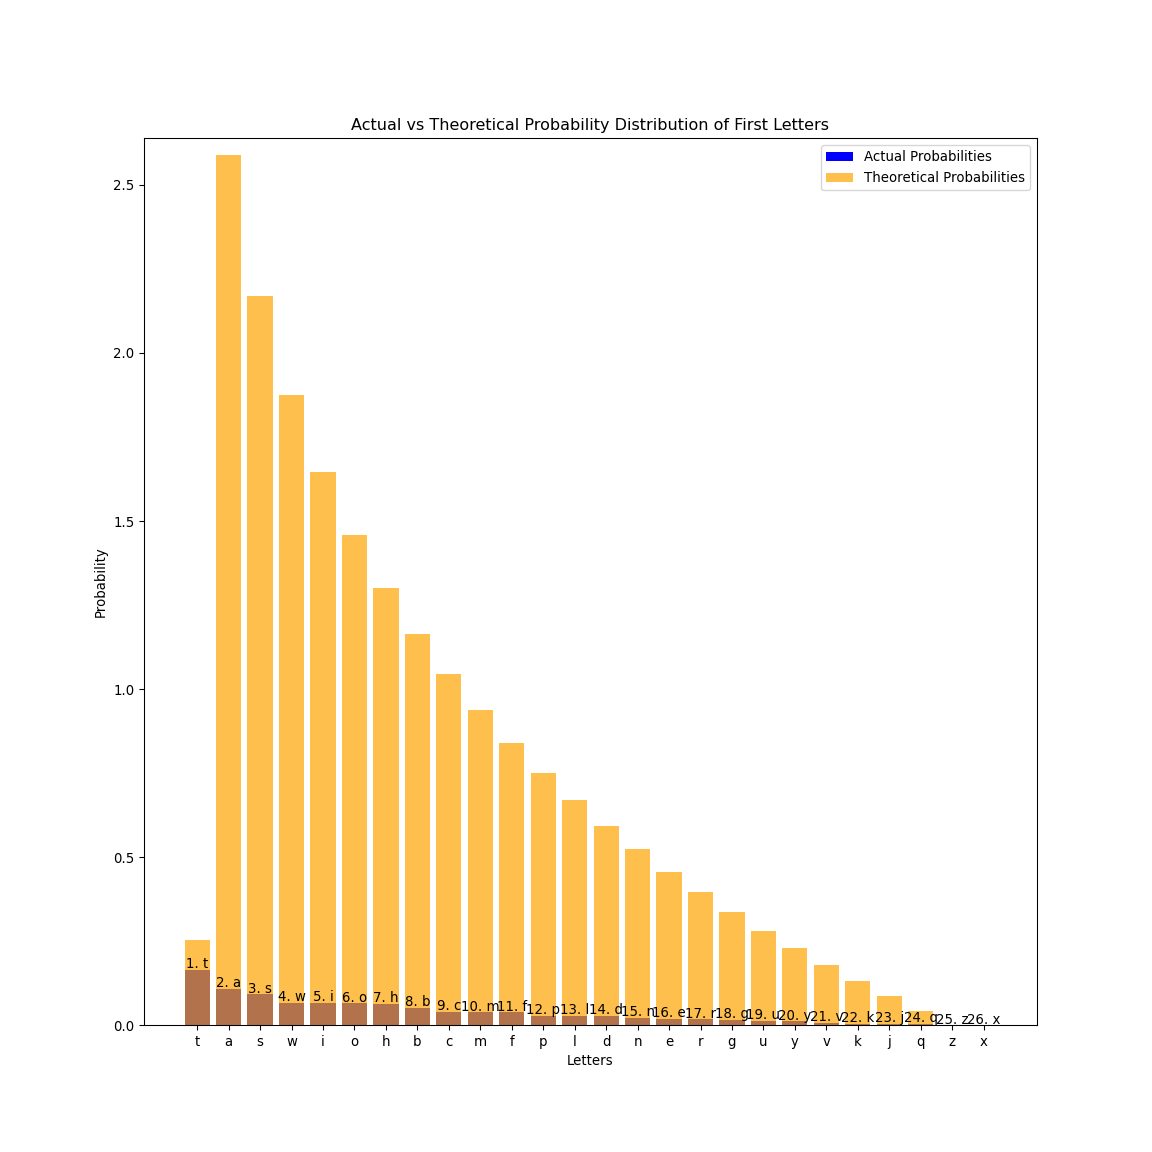

In [87]:
lst = fileToList("./moby_dick.txt")
npa = np.asarray(lst, dtype=str)
npa = npa[npa != '']
npa = np.array([word.lower() for word in npa])
npa = np.array([re.sub(r'[^a-zA-Z]', '', word) for word in npa])
npa = np.array([word[0] if word else '' for word in npa])
npa = np.char.strip(npa, ' ')
npa = npa[npa != '']
np.set_printoptions(threshold=np.inf)
unique_elements, counts_elements = np.unique(npa, return_counts=True)

letters = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
counts = np.array([24300, 11433, 8819, 6047, 4132, 8576, 3706, 13970, 14850, 863, 982, 6279, 8616, 4937, 14544, 6405, 727, 4028, 20427, 36441, 2748, 1651, 15031, 5, 2614, 35])

total_count = np.sum(counts)
probabilities = counts / total_count


sorted_indices = np.argsort(probabilities)[::-1]
sorted_probabilities = probabilities[sorted_indices]
sorted_letters = letters[sorted_indices]
result = np.column_stack((sorted_letters, sorted_probabilities))

def calculate_probability(i):
    if i == 1:
        return (1 + 25 * np.log(26 / 25)) / (26 * 25 * np.log(26 / 25) / np.log(26))
    else:
        return (26 - 25 * np.log(i) / np.log(26) - i * np.log(i) / np.log(26) + (i - 1) * np.log(i - 1) / np.log(26)) / (26 * 25 * np.log(26 / 25) / np.log(26))

i_values = np.arange(1, 27)
probabilities = [calculate_probability(i) for i in i_values]

theoretical_probabilities = [calculate_probability(i) for i in range(1, 27)]
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(range(len(sorted_letters)), sorted_probabilities, color='blue', label='Actual Probabilities')
ax.bar(range(len(sorted_letters)), theoretical_probabilities, color='orange', alpha=0.7, label='Theoretical Probabilities')

ax.set_xlabel('Letters')
ax.set_ylabel('Probability')
ax.set_title('Actual vs Theoretical Probability Distribution of First Letters')
for i, (letter, prob) in enumerate(zip(sorted_letters, sorted_probabilities)):
    ax.text(i, prob + 0.005, f'{i+1}. {letter}', ha='center')

ax.set_xticks(range(len(sorted_letters)))
ax.set_xticklabels(sorted_letters)
ax.set_ylim(0, max(max(sorted_probabilities), max(theoretical_probabilities)) + 0.05)

ax.legend()
plt.show()

##### Step 2) 

Calculate the Mean Square Error (MSE) between the distribution your obtained and the one given by the FLL. For this problem, the MSE is given by:
$$
\text{MSE} = \frac{1}{26} \sum_{i=1}^{26} (p_i - \hat{p}_i)^2,
$$
where $p_i$ is the probability given by the FLL and $\hat{p}_i$ is the probability determined from the data. 

In [88]:

def calculate_probability(i):
    if i == 1:
        return (1 + 25 * np.log(26 / 25)) / (26 * 25 * np.log(26 / 25) / np.log(26))
    else:
        return (26 - 25 * np.log(i) / np.log(26) - i * np.log(i) / np.log(26) + (i - 1) * np.log(i - 1) / np.log(26)) / (26 * 25 * np.log(26 / 25) / np.log(26))

i_values = np.arange(1, 27)
FLL_probabilities = [calculate_probability(i) for i in i_values]
ar1 = np.array(FLL_probabilities)

letters = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
counts = np.array([24300, 11433, 8819, 6047, 4132, 8576, 3706, 13970, 14850, 863, 982, 6279, 8616, 4937, 14544, 6405, 727, 4028, 20427, 36441, 2748, 1651, 15031, 5, 2614, 35])

total_count = np.sum(counts)
data_probabilities = counts / total_count



mse = np.mean((FLL_probabilities - data_probabilities)**2)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1.0176472977669702



Interpreting the plot is somewhat challenging since we aimed to sort the probabilities in descending order. It is apparent from the plot that letters appearing later in the alphabet generally have a lower probability of occurrence, although there are exceptions. For instance, the letter "t" seems to occur frequently despite its later position in the alphabet. In conclusion, the MSE value of 1.0176472977669702 suggests that Moby Dick does not perfectly follow the First Letter Law (FLL), as a lower MSE would have indicated a closer fit.


Comment on your plot and the numerical value of the MSE obtained above. Is the result as expected? Why/Why not? 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2 (15 points):

### Visualizing Trends in an Index


###### Motivation: 
This exercise is intended to help you explore and consider the time scale that is used to present data. This question explores graphing data over different time intervals.

###### Tools: 
For this question you may use NumPy and matplotlib. You may also use any built-in data structures or functions,  Please do not use `pandas`.


##### Problem:
In this exercise you will plot the [Air Quality Index](https://aqicn.org/data-platform/register/) (Pm25) along with 7-day and 14-day averages. The provided dataset (in csv format) contains the daily average air quality for the Calgary central monitoring location from Sep. 01, 2020 to Aug 31, 2021 (data obtained from https://aqicn.org/data-platform/register/). 

###### Step 0)

Reflect on the data. What are some of its limitations? (Name two.)

_Type your answer here, replacing this text._

##### Steps: 
- Read the dataset using the `fileToList` function defined above. For this question, use the regular expression `r'[,\r\n]+'` rather than the default. Inspect the result and familiarize yourself with the content of the returned list.
- Observe that the average values are at a daily interval, and that all days have a value recorded. We therefore do not need the date information. Clean up the data and only retain the air quality information. Store the result in a list or a `numpy` array in floating point format.
- Recall that a [simple moving average](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) is defined as the (unweighted) mean over the previous $N$ days.<br> 
Determine the simple moving average of the air quality. The number of days $N$ to average over should be adjustable. If you are using `numpy`, you may find the function [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) helpful.  
- Plot the raw air quality index data along with 7-day and 14-day simple moving average. Plot on the same figure in order to help you visually ascertain the effect of the filter.

##### Return data types:
- The Floating averages should be presented as integers


##### Hints:
- Generators can be very useful in some situations
- Use plt.legend to create a legend for your plot
- If you get stuck try referring to relevant documentation

Please provide your solution below.

In [61]:
air = fileToList('calgary-central 2, alberta-air-quality.csv', regexp=r'[,\r\n]+')
air [ :5]



['date', ' pm25', '2020-10-01', '29', '2020-10-02']

In [73]:
air_quality_data = [float(value) for value in air[3::2]]
air_quality_data = np.array(air_quality_data)
def simple_moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')


In [66]:
seven_day = simple_moving_average(air_quality_data, window_size=7)
fourteen_day = simple_moving_average(air_quality_data, window_size=14)

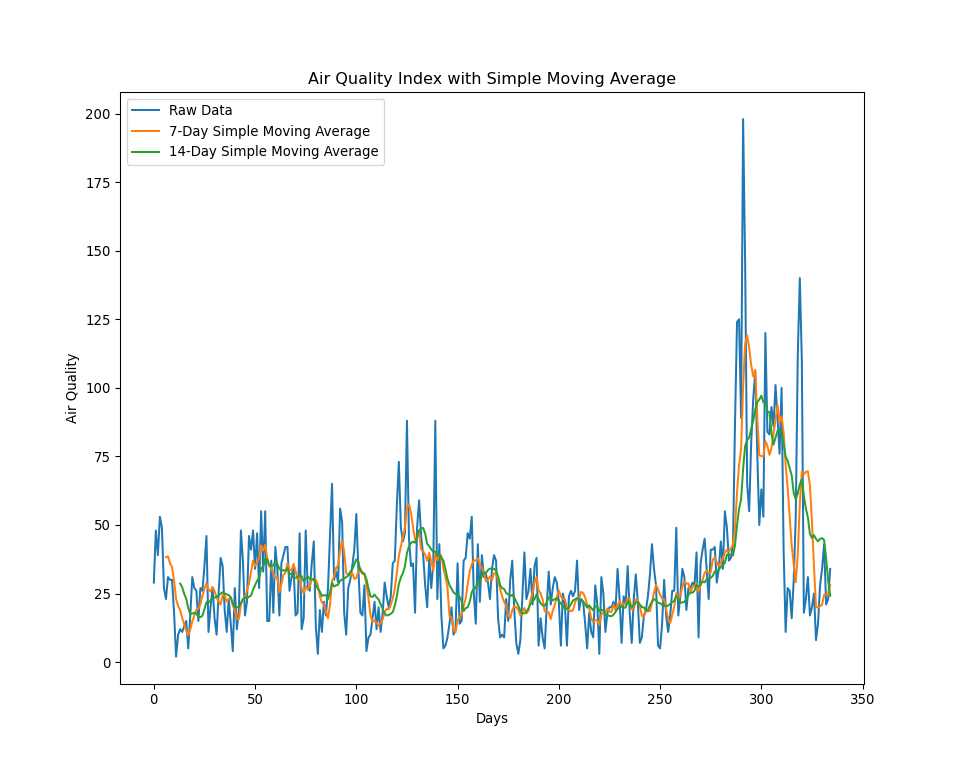

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

plt.plot(air_quality_data, label='Raw Data')

plt.plot(range(6, len(air_quality_data)), seven_day, label='7-Day Simple Moving Average')

plt.plot(range(13, len(air_quality_data)), fourteen_day, label='14-Day Simple Moving Average')

plt.xlabel('Days')
plt.ylabel('Air Quality')
plt.title('Air Quality Index with Simple Moving Average')
plt.legend()

plt.show()       



Please use the Markdown cell below to answer the following questions.

- Describe algorithmically how you set out to calculate the moving average. What was your process?
- What is the effect of the moving average filter? 
- In what circumstances would you _not_ want to use a moving average? Do you think that the moving average is appropriate in this case? 




<!-- END QUESTION -->



In [ ]:
#a) Input data (air quality values), Window size (number of data points to include in each average). Create weights by dividing 1 by the window size. set the np.convolve function to compute the moving average. 
#b) Moving average filter will primarily smooth out fluctuations, and smooth out representations of large data
#c) Would not want to use with high frequency data where you want to capture fluctuations. The moving average filter is appropriate depending on the analysis. Here its appropriate to see movement relative to the raw data, and an overall trend.
